# 0. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

# 2. Data Preprocessing

In [ ]:
df = pd.read_csv('data/FT1000_v0.csv')
df.head()

,Rank,Name,in 2021 ranking,in 2020 ranking,Country,Sector,Absolute Growth Rate %,Compound Annual Growth Rate (CAGR) %,Revenue 2020 (€),Revenue 2017 (€),...,Unnamed: 990,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999
0,1.0,Swappie,No,No,Finland,Technology,19152.82,477.43,97611814.0,507000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Kilo Health,No,No,Lithuania,Health,16541.73,450.05,57318766.0,344428.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,OCI,No,No,UK,Financial Services,13133.13,409.59,568322073.0,4325512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,OnlyFans,No,No,UK,Technology,11928.05,393.63,316732986.0,2652185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Enpal,No,No,Germany,Energy,11441.27,386.88,56109613.0,486165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.5. Outliers
Ở phần này nhóm tiến hành kiểm tra outliers ở các cốt. Cột `Rank` và `Name` là key value, do đó không kiểm tra outliers trên các cột này

### 2.5.1. Các cột categorical

In [ ]:
df['in 2020 ranking'].value_counts()

In [ ]:
df['in 2021 ranking'].value_counts()

No     694
Yes    306
Name: in 2021 ranking, dtype: int64

In [ ]:
df['Country'].value_counts()

Italy              235
Germany            194
UK                 155
France             147
Spain               49
Poland              34
Sweden              28
The Netherlands     19
Hungary             13
Norway              11
Finland             11
Lithuania           11
Czech Republic      11
Belgium             10
Romania              8
Croatia              7
Slovakia             7
Bulgaria             7
Portugal             7
Denmark              6
Greece               5
Austria              5
Estonia              4
Ireland              4
Switzerland          4
Cyprus               3
Slovenia             2
Luxembourg           1
Latvia               1
Liechtenstein        1
Name: Country, dtype: int64

Có tới 30 quốc gia có công ty tham gia xếp hạng nhưng chủ yếu chỉ tập trung ở top 5, 6 quốc gia đầu tiên, phần lớn còn lại nằm ở mức dưới 10 công ty một quốc gia. Nhiều quốc gia chỉ có từ 1 tới 2 công ty tham gia. Sau khi bàn bạc, nhóm quyết định gom nhóm các quốc gia có từ 5 công ty trở xuống vào một nhóm, gọi là `Other` và lưu vào cột `Country1`

In [ ]:
other_country = df['Country'].value_counts()[df['Country'].value_counts() <= 5].index
df['Country1'] = df['Country']
df['Country1'].replace(other_country, 'Other', inplace = True)

In [ ]:
df['Sector'].value_counts()

Technology                      209
Construction                     89
Retail                           86
Ecommerce                        65
Support Services                 56
Health                           43
Energy                           42
Industrial Goods                 36
Advertising                      33
Transport                        28
Financial Services               28
Property                         26
Fintech                          26
Automobiles                      26
Management Consulting            22
Food & Beverage                  20
Telecoms                         20
Education                        15
Interiors                        12
Waste management & recycling     12
Media                            11
Cyber Security                   10
Fashion                          10
Personal & Household Goods       10
Sales & Marketing                10
Chemicals & Pharmaceuticals       8
Travel & Leisure                  7
Agricultural Commodities    

Có 39 lĩnh vực các công ty tham gia xếp hạng hoạt động, quá nửa trong số đó có từ 10 công ty tham gia hoạt động so với top 1 tới 209 công ty. Dù vậy sau khi bàn bạc, nhóm quyết định gom nhóm các lĩnh vực có từ 7 công ty trở xuống và gom vào nhóm `Other`, lưu vào cột `Sector1`

In [ ]:
other_country = df['Sector'].value_counts()[df['Sector'].value_counts() <= 5].index
df['Sector1'] = df['Sector']
df['Sector1'].replace(other_country, 'Other', inplace = True)

### 2.5.2. Các cột numerical


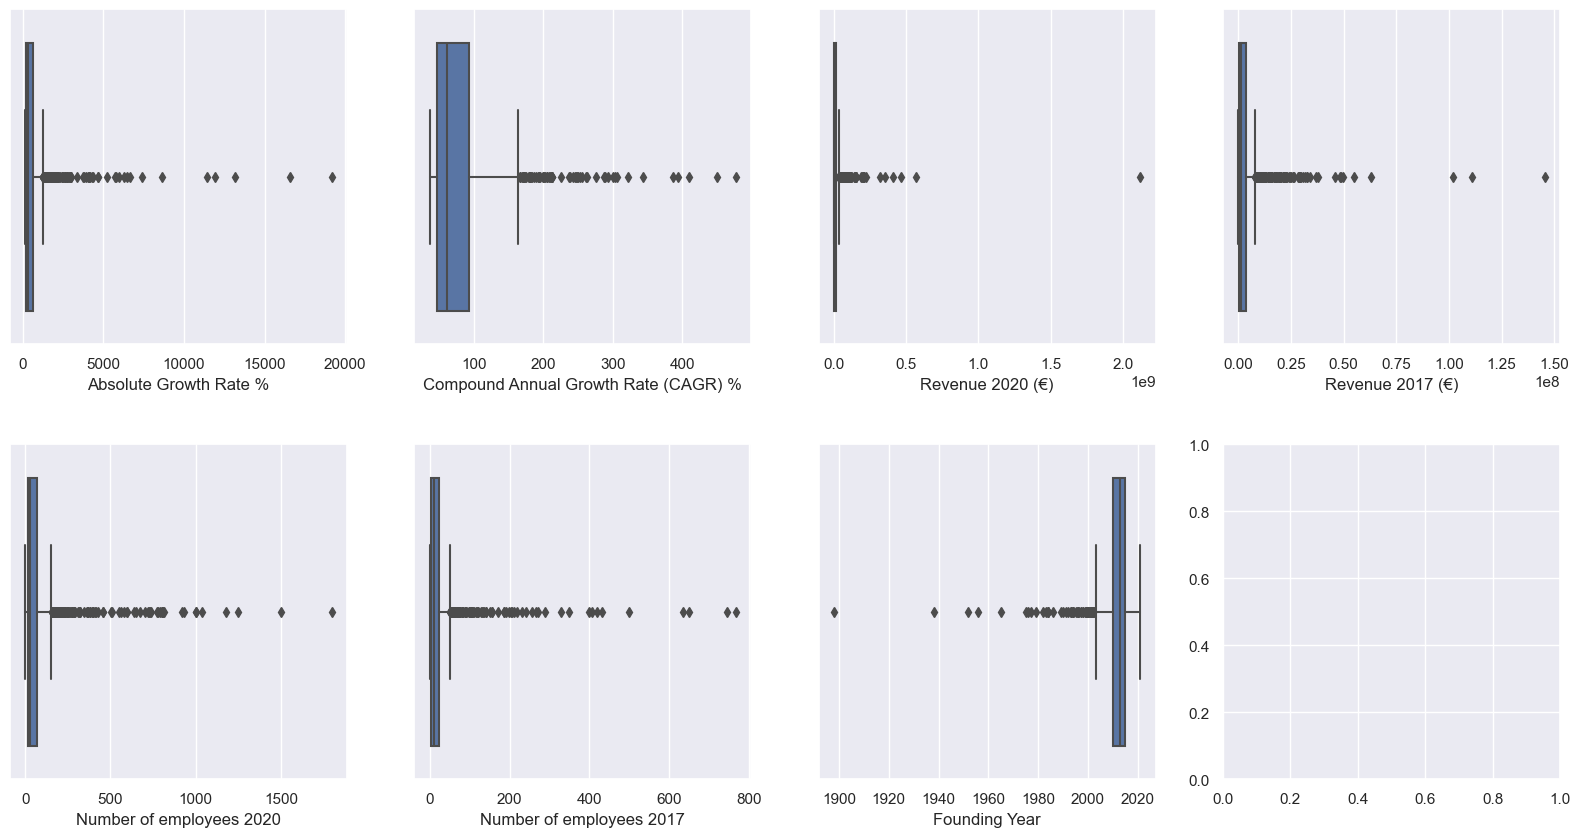

In [ ]:
numerical_columns = df.keys()[6:]

fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))
fig.subplots_adjust(hspace = 0.3)

for i, ax in enumerate(axes.flatten()[:7]):
    sns.boxplot(df[numerical_columns[i]], ax = ax)

Tuy ở các cột đều xuất hiện outliers nhưng theo `Financial Times`, các outliers này đều đã được kiểm tra và đánh giá bởi `Statista`, do đó nhóm cũng sẽ không can thiệp vào các outliers này 

## 2.6. Xóa cột Absolute Growth Rate %
Ở đây nhóm nhận thấy cách tính và ý nghĩa của Absolute Growth Rate và Compound Annual Growth Rate khá tương tự, tuy nhiên Compound Annual Growth Rate cho biết tốc độ tăng trưởng trung bình theo năm, có nhiều ý nghĩa hơn, do đó ta chỉ cần giữ lại cột này và xóa cột Absolute Growth Rate

In [ ]:
df.drop(columns = ['Absolute Growth Rate %'], inplace = True)